In [23]:
import pandas as pd
from math import sqrt

In [24]:
qw = pd.read_csv("aggregated_quality_workers.csv").sort_values(by='File Path')

In [25]:
rw = pd.read_csv("aggregated_random_workers.csv").sort_values(by='File Path')

In [26]:
diff = {}
cosine_similarities = {}
for i, resume in qw.iterrows():
    dot = 0.0
    a_vals = []
    b_vals = [] 
    for col in qw.columns:
        if not type(qw.iloc[i][col]) == str:
            dot += qw.iloc[i][col]*rw.iloc[i][col]
            a_vals.append(int(qw.iloc[i][col]))
            b_vals.append(int(rw.iloc[i][col]))
        if not qw.iloc[i][col] == rw.iloc[i][col]:
            curr = diff.get(col, 0)
            diff[col] = curr + 1
    cosine_similarities[i] = dot/(sqrt(sum([a*a for a in a_vals]))*sqrt(sum([b*b for b in b_vals])))
        

In [27]:
import matplotlib.pyplot as plt

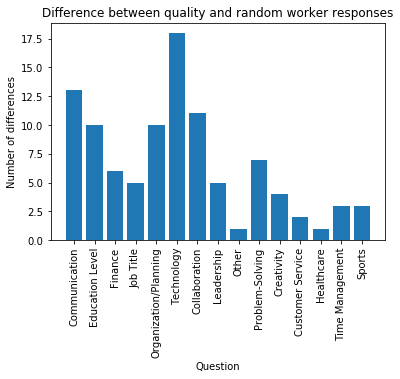

In [30]:
x = list(diff.keys())
y = list(diff.values())
plt.bar(x, [v for v in y])
plt.xticks(rotation=90)
plt.xlabel("Question")
plt.ylabel("Number of differences")
plt.title("Difference between quality and random worker responses")
plt.show()

In [7]:
sum(cosine_similarities.values())/len(cosine_similarities.values())

0.49734713144646736

In [8]:
def match_stats(batch, agg):
    random_aggregated_match = {}
    random_aggregate_count = {}
    for i, row in batch.iterrows():
        aggregated = agg.loc[rw['File Path'] == row['Input.document_url']]
        for col in aggregated.columns:
            if "Answer.{}".format(col) not in batch.columns:
                continue
            if aggregated[col].values[0] == row["Answer.{}".format(col)]:
                random_aggregated_match[col] = random_aggregated_match.get(col, 0) + 1
            random_aggregate_count[col] = random_aggregate_count.get(col, 0) + 1
    for key in random_aggregated_match:
        random_aggregated_match[key] /= random_aggregate_count[key]
    return random_aggregated_match

In [9]:
random_batch = pd.read_csv("random_workers_batch_results.csv")
quality_batch = pd.read_csv("quality_workers_batch_results.csv")

In [10]:
rando = match_stats(random_batch, rw)

In [11]:
rando

{'Communication': 0.6694444444444444,
 'Creativity': 0.6527777777777778,
 'Customer Service': 0.6388888888888888,
 'Education Level': 0.6611111111111111,
 'Entertainment': 0.8,
 'Job Title': 0.44722222222222224,
 'Law': 0.8916666666666667,
 'Leadership': 0.6333333333333333,
 'Manufacturing': 0.8805555555555555,
 'Organization/Planning': 0.5805555555555556,
 'Other': 0.7055555555555556,
 'Time Management': 0.625,
 'Collaboration': 0.5805555555555556,
 'Problem-Solving': 0.6111111111111112}

In [12]:
quality = match_stats(quality_batch, qw)

In [13]:
quality

{'Collaboration': 0.7843137254901961,
 'Creativity': 0.7843137254901961,
 'Customer Service': 0.9411764705882353,
 'Entertainment': 1.0,
 'Government': 0.9607843137254902,
 'Healthcare': 0.9607843137254902,
 'Job Title': 0.8627450980392157,
 'Law': 1.0,
 'Manufacturing': 1.0,
 'Organization/Planning': 0.7450980392156863,
 'Other': 0.7254901960784313,
 'Problem-Solving': 0.8627450980392157,
 'Service Industry': 0.8627450980392157,
 'Sports': 0.8627450980392157,
 'Time Management': 0.9411764705882353,
 'Communication': 0.7058823529411765,
 'Education Level': 0.7843137254901961,
 'Leadership': 0.7843137254901961,
 'Technology': 0.7058823529411765}

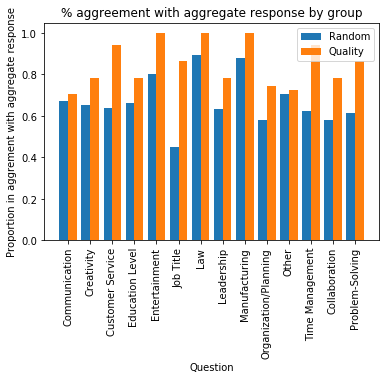

In [21]:
import numpy as np
X = list(rando.keys())
Yrando = [rando[x] for x in X]
Zquality = [quality[x] for x in X]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Yrando, 0.4, label = 'Random')
plt.bar(X_axis + 0.2, Zquality, 0.4, label = 'Quality')
  
plt.xticks(X_axis, X, rotation=90)
plt.xlabel("Question")
plt.ylabel("Proportion in aggrement with aggregate response")
plt.title("% aggreement with aggregate response by group")
plt.legend()
plt.show()

In [16]:
len(Yrando)

14

In [17]:
len(Zquality)

14

In [18]:
len(X)

14